In [1]:
#importing pandas,numpy,matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing test dataset
test=pd.read_csv('TEST_FINAL.csv')

In [3]:
#importing train dataset
train=pd.read_csv('TRAIN.csv')

In [4]:
#train columns
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [5]:
#test columns
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [6]:
#head
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [7]:
#tail
train.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


In [8]:
#adding #order column to test
test['#Order']='test'

In [9]:
#adding sales column to test
test['Sales']='test'

In [10]:
#shape of test
test.shape

(22265, 10)

In [11]:
#shape of train
train.shape

(188340, 10)

In [12]:
#combining test and train dataset
df=pd.concat([test,train],axis=0)

In [13]:
#head
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,test,test
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,test,test
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,test,test
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,test,test
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,test,test


In [14]:
#extracting year from  date
year=df['Date'].apply(lambda x:x[0:4])

In [15]:
#extracting month from  date
month=df['Date'].apply(lambda x:x[5:7])

In [16]:
#extracting date from  date
date=df['Date'].apply(lambda x:x[8:10])

In [17]:
#adding year column to df
df['year']=year

In [18]:
#adding month column to df
df['month']=month

In [19]:
#adding date column to df
df['date']=date

In [20]:
#dropping date column
df=df.drop('Date',axis=1)

In [21]:
#shape
df.shape

(210605, 12)

In [22]:
#checking null values
df.isnull().sum().sort_values(ascending=True)

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
#Order           0
Sales            0
year             0
month            0
date             0
dtype: int64

In [23]:
#datatypes
df.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Holiday           int64
Discount         object
#Order           object
Sales            object
year             object
month            object
date             object
dtype: object

In [24]:
#importing seaborn
import seaborn as sns

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

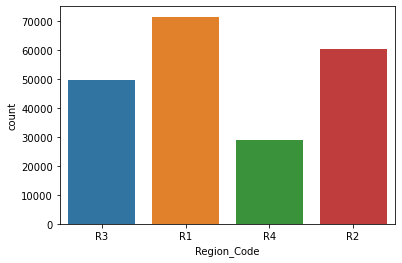

In [25]:
#countplot of Region_Code
sns.countplot(x='Region_Code',data=df)

<AxesSubplot:ylabel='Store_Type'>

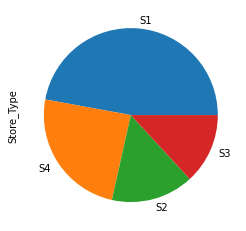

In [26]:
#pie chart of Store_Type
df['Store_Type'].value_counts().plot(kind='pie')

<AxesSubplot:>

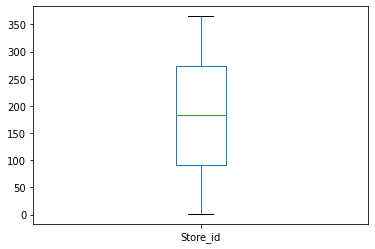

In [27]:
#box plot of Store_id
df['Store_id'].plot(kind='box')

In [28]:
#dividing the data into object and numeric
obj=df.select_dtypes(include=['object'])
num=df.select_dtypes(include=np.number)

In [29]:
#shape of object and numeric
print(obj.shape)
print(num.shape)

(210605, 10)
(210605, 2)


In [30]:
#dividing the categorical data from numeric and converting into dataframe
cat=num['Holiday']
cat=pd.DataFrame(cat,columns=['Holiday'])

In [31]:
#dropping holiday column from the num column
num=num.drop('Holiday',axis=1)

In [32]:
#adding sales column from obj to num
num['Sales']=obj['Sales']

In [33]:
#adding order column from obj to num
num['#Order']=obj['#Order']

In [34]:
#dropping sales from obj
obj=obj.drop('Sales',axis=1)

In [35]:
#dropping #order from obj
obj=obj.drop('#Order',axis=1)

In [36]:
#dropping ID from obj
obj=obj.drop('ID',axis=1)

In [37]:
#columns of obj
obj.columns

Index(['Store_Type', 'Location_Type', 'Region_Code', 'Discount', 'year',
       'month', 'date'],
      dtype='object')

In [38]:
#columns of num
num.columns

Index(['Store_id', 'Sales', '#Order'], dtype='object')

In [39]:
#applying label encoder for cat data
catdummy=pd.get_dummies(cat)

In [40]:
#applying label encoder for obj data
objdummy=pd.get_dummies(obj)

In [41]:
#combining the obj,catdummy and num data
cleandf=pd.concat([catdummy,num,objdummy],axis=1)

In [42]:
#head
cleandf.head()

,Holiday,Store_id,Sales,#Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,...,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31
0,0,171,test,test,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,172,test,test,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,173,test,test,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,174,test,test,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,170,test,test,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#dropping store_id from cleandf
cleandf=cleandf.drop('Store_id',axis=1)

In [44]:
#again dividing data into train and test
traindf=cleandf[cleandf['Sales']!='test']
testdf=cleandf[cleandf['Sales']=='test']

In [45]:
#dropping #order and sales from the test data
testdf=testdf.drop(['Sales','#Order'],axis=1)

<AxesSubplot:>

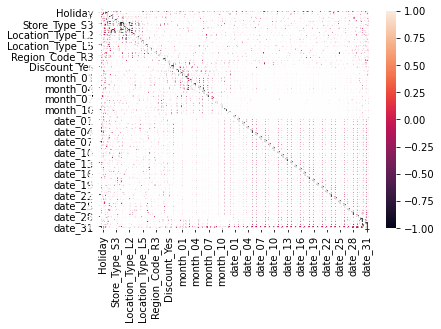

In [46]:
#heatmap of traindf data
sns.heatmap(traindf.corr(),annot=True)

<AxesSubplot:>

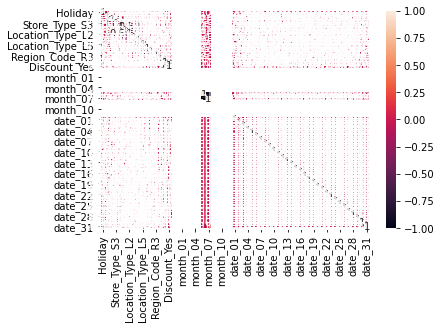

In [47]:
#heatmap of testdf data
sns.heatmap(testdf.corr(),annot=True)

<AxesSubplot:>

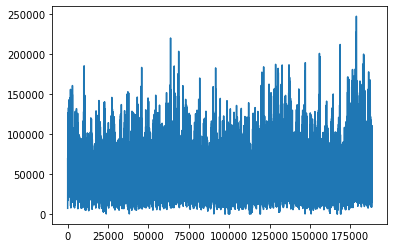

In [48]:
#line plot of Sales data
traindf['Sales'].plot(kind='line')

<AxesSubplot:>

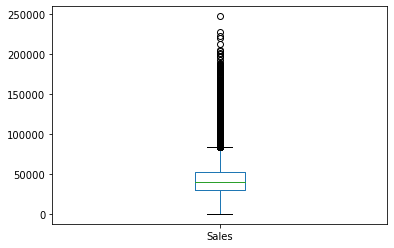

In [49]:
#boxplot of sales
traindf['Sales'].plot(kind='box')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

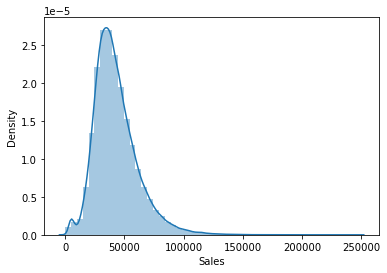

In [50]:
#distplot of sales
sns.distplot(traindf['Sales'])

<AxesSubplot:xlabel='Holiday', ylabel='count'>

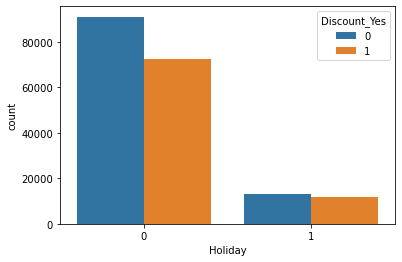

In [51]:
sns.countplot(x='Holiday',data=traindf,hue='Discount_Yes')

In [52]:
#hypothesis testing of holiday and sales
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

In [53]:
traindf['Sales']=traindf['Sales'].astype('int32')
traindf.groupby(['Holiday'])['Sales'].mean()

<ipython-input-53-0248109983f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Sales']=traindf['Sales'].astype('int32')


Holiday
0    43897.288998
1    35451.448388
Name: Sales, dtype: float64

In [54]:
#dividing on basis of holiday
y=traindf[traindf['Holiday']==1]
n=traindf[traindf['Holiday']==0]

In [55]:
ttest_ind(y['Sales'],n['Sales'],equal_var=False)
#p-value is less than 0.05,so reject null hypothesis. 
#so there is relation between Sales and Holiday

Ttest_indResult(statistic=-66.17910651167433, pvalue=0.0)

In [56]:
#checking relation between Location_Type_L1 and Store_Type_S4
chi2_contingency(pd.crosstab(traindf['Store_Type_S4'],traindf['Location_Type_L1']))
#p-value is less than 0.05,so reject null hypothesis. 
#so there is relation between Store_Type_S4 and Location_Type_L1

(5419.512137508023,
 0.0,
 1,
 array([[78036.16438356, 64379.83561644],
        [25163.83561644, 20760.16438356]]))

In [57]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
#independent and dependent variables for sales prediction
y=traindf['Sales']
X=traindf.drop(['Sales','#Order'],axis=1)

In [60]:
#model building for sales prediction
lrmodel1=lr.fit(X,y)

In [61]:
lrmodel1.score(X,y) #R-Square

0.5742342475729032

In [62]:
#prediction of test data
lrpredict1=lrmodel1.predict(testdf)

In [63]:
#converting data to csv file
pd.DataFrame(lrpredict1).to_csv('lrtest.csv')

In [64]:
lrpredict2=lrmodel1.predict(X)

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_val_score(lr,X,y)

array([ 4.78787367e-01, -1.91418106e+22, -6.63679648e+23, -6.47451335e+24,
        5.17412150e-01])

In [67]:
res=y-lrpredict2 #Residual

In [68]:
np.sqrt(np.mean(res**2)) #RMSE

12043.120204697689

In [69]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt=DecisionTreeRegressor(max_depth=4)

In [71]:
#model building for predicting sales
dtmodel1=dt.fit(X,y)

In [72]:
dtmodel1.score(X,y) #R-Square

0.5212672923300057

In [73]:
#prediction of test data
dtpredict1=dtmodel1.predict(testdf)

In [74]:
#converting data to csv file
pd.DataFrame(dtpredict1).to_csv('dttest.csv')

In [75]:
dtpredict2=dtmodel1.predict(X)

In [76]:
cross_val_score(dt,X,y)

array([0.50704688, 0.51425164, 0.54128244, 0.4895385 , 0.48538927])

In [77]:
res=y-dtpredict2 #Residual

In [78]:
np.sqrt(np.mean(res**2)) #RMSE

12770.273797769869

In [79]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf=RandomForestRegressor(n_estimators=1000)

In [ ]:
#model building for predicting sales
rfmodel1=rf.fit(X,y)

In [ ]:
rfmodel1.score(X,y) #R-Square

In [ ]:
#prediction of test data
rfpredict1=rfmodel1.predict(testdf)

In [ ]:
#converting data to csv file
pd.DataFrame(rfpredict1).to_csv('rftest.csv')

In [ ]:
rfpredict2=rfmodel1.predict(X)

In [ ]:
res=y-rfpredict2 #Residual

In [ ]:
np.sqrt(np.mean(res**2)) #RMSE

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb=GradientBoostingRegressor(n_estimators=1000)

In [ ]:
#model building for predicting sales
gbmodel1=gb.fit(X,y)

In [ ]:
gbmodel1.score(X,y) #R-Square

In [ ]:
#prediction of test data
gbpredict1=gbmodel1.predict(testdf)

In [ ]:
#converting data to csv file
pd.DataFrame(gbpredict1).to_csv('gbtest.csv')

In [ ]:
gbpredict2=gbmodel1.predict(X)

In [ ]:
res=y-gbpredict2 #Residual

In [ ]:
np.sqrt(np.mean(res**2)) #RMSE

In [ ]:
#xgboost
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.09)

In [ ]:
#model building for predicting sales
xgbmodel1=xgb.fit(X,y)

In [ ]:
xgbmodel1.score(X,y) #R-Square

In [ ]:
#prediction of test data
xgbpredict1=xgbmodel1.predict(testdf)

In [ ]:
#converting data to csv file
pd.DataFrame(xgbpredict1).to_csv('xgbtest.csv')

In [ ]:
xgbpredict2=xgbmodel1.predict(X)

In [ ]:
res=y-xgbpredict2 #Residual

In [ ]:
np.sqrt(np.mean(res**2)) #RMSE